In [1]:
import pandas as pd
df=pd.read_excel("Cardiac_Outcomes.xlsx")


In [2]:
import glob
glob.glob("Cardiac_Outcomes.xlsx")

['Cardiac_Outcomes.xlsx']

In [3]:
data_file=('Cardiac_Outcomes.xlsx')
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']

In [ ]:
#15Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

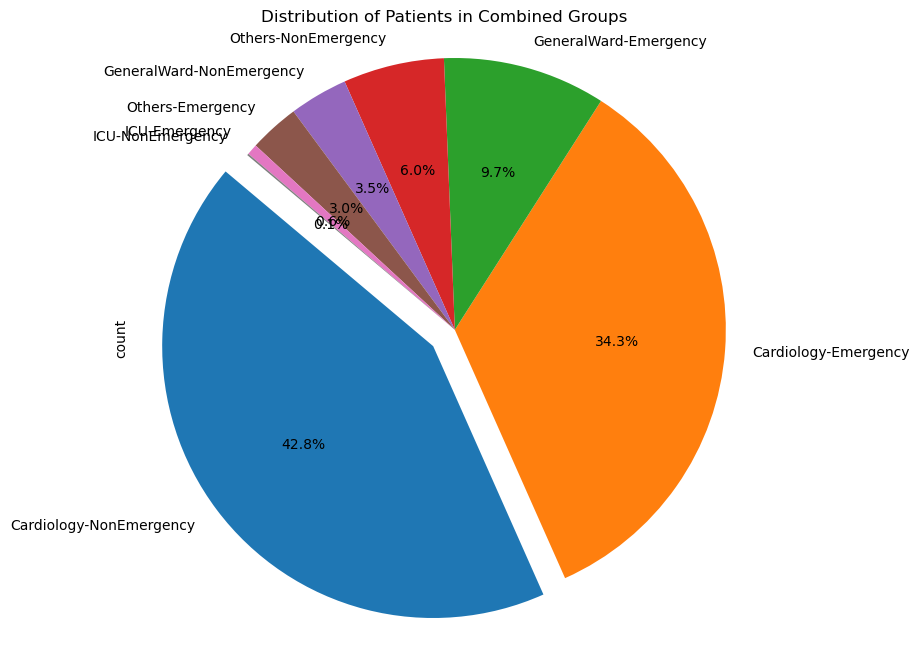

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
selected_columns= response2[['admission_ward','admission_way']]
#print(selected_columns)
df=pd.DataFrame(selected_columns)
df['combine']=df['admission_ward']+'-'+df['admission_way']
patients_counts = df['combine'].value_counts()
max_index = patients_counts.idxmax()
explode = [0.1 if idx == max_index else 0 for idx in patients_counts.index]
plt.figure(figsize=(8, 8))
patients_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Patients in Combined Groups')
plt.axis('equal')
plt.show()



In [ ]:
#13Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

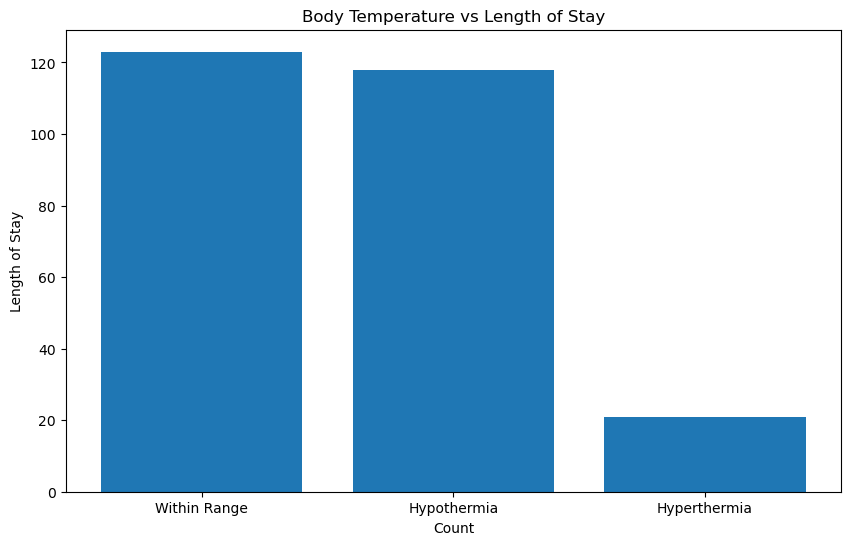

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')

length_0f_stay=response2[['dischargeDay']]
response4= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')

merged=pd.merge(response2,response4, on='inpatient_number')
def temperature(temp):
    if temp < 36.5:
        return 'Hypothermia'
    elif temp >= 36.5 and temp <= 37.5:
        return 'Within Range'
    else:
        return 'Hyperthermia'
merged['temp_category'] =merged['body_temperature'].apply(temperature)
group = merged.groupby(['temp_category', 'dischargeDay'])
#group.plot(kind='bar', stacked=True)
plt.figure(figsize=(10, 6))
bars = plt.bar(merged['temp_category'], merged['dischargeDay'])


plt.xlabel('Count')
plt.ylabel('Length of Stay')
plt.title('Body Temperature vs Length of Stay')
plt.show()


In [ ]:
#11	"A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print ""YES"" 
 if it is a valid mobile number and ""NO"" if it is not on separate lines. Do not print the quotes.
{2,9587456281,1252478965,7397260044}"

In [5]:
import re

# List of strings
data = ["2", "9587456281", "1252478965", "7397260044"]


pattern = r'^[7-9]\d{9}$'

for x in data:
    print(x)
    if re.match(pattern,x ):
        print("YES")
    else:
        print("NO")

2
NO
9587456281
YES
1252478965
NO
7397260044
YES


In [ ]:
##12If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [6]:
import pandas as pd 

response3= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')
response4= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs') 


outside_range = response3[(response3['left_ventricular_end_diastolic_diameter_LV'] < 3.5) | (response3['left_ventricular_end_diastolic_diameter_LV'] > 5.6)]


print("No of patients out of range :",len(outside_range['inpatient_number'])) 
x=response4[response4['inpatient_number'].isin (outside_range['inpatient_number'])] # getting the data from labs for the above patients

map_cnt = x.value_counts(['map'])  # getting the map value and  patients in that range
print(map_cnt)

No of patients out of range : 1311
map       
96.666667     56
93.333333     49
83.333333     48
100.000000    42
86.666667     38
              ..
60.000000      1
96.333333      1
95.666667      1
94.333333      1
181.333333     1
Name: count, Length: 196, dtype: int64


In [ ]:
#14Find the list of patients whose DischargeDay is greater than the value given by the user

In [7]:
import pandas as pd



#no_of_days =  int(input(" hi enter day"))
#print('no_of_days')



#user_date = pd.to_date(user_input)

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')

selected_patients =response2 [response2['dischargeDay'] >11]


print(selected_patients['inpatient_number'],selected_patients['dischargeDay'])

7       787530
8       795420
13      744167
16      759947
17      825016
         ...  
1987    759370
1993    733199
1997    750447
1999    804209
2005    781004
Name: inpatient_number, Length: 392, dtype: int64 7       27
8       20
13      22
16      16
17      14
        ..
1987    28
1993    13
1997    29
1999    29
2005    14
Name: dischargeDay, Length: 392, dtype: int64


In [ ]:
#Group the days to re-admission into bins and count how many patients were in each bin

In [26]:
import pandas as pd
from collections import Counter

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
selected_columns = response2.groupby(['re_admission_within_28_days','re_admission_within_3_months','re_admission_within_6_months'])['inpatient_number'].value_counts()
print(selected_columns)
df = pd.DataFrame(selected_columns)

# Define bins for binning the counts
bins = [0, 1, 2, 3, 4]

# Bin the counts
df['Bin'] = pd.cut(df['count'], bins=bins, right=False)

# Count the occurrences of each bin
bin_counts = df['Bin'].value_counts()

# Print the counts for each bin
print(bin_counts)


re_admission_within_28_days  re_admission_within_3_months  re_admission_within_6_months  inpatient_number
0                            0                             0                             723617              1
                                                                                         725777              1
                                                                                         852644              1
                                                                                         856372              1
                                                                                         855972              1
                                                                                                            ..
1                            1                             1                             788518              1
                                                                                         787876              1
      

In [21]:
#15	"Display a pie chart of number of patients in each category listed
-death_within_28_days
-re_admission_within_28_days
-death_within_3_months 
-re_admission_within_3_months 
-death_within_6_months 
-re_admission_within_6_months
-return_to_emergency_department_within_6_months"

In [ ]:
#33Retrieve the row with minimum white_blood_cell count using sorting technique.

death_within_28_days  re_admission_within_28_days  death_within_3_months  re_admission_within_3_months  death_within_6_months  re_admission_within_6_months  return_to_emergency_department_within_6_months
0                     0                            0                      0                             0                      0                             0.0                                               1169
                                                                          1                             0                      1                             1.0                                                356
                                                                          0                             0                      1                             1.0                                                274
                      1                            0                      1                             0                      1                             1.0

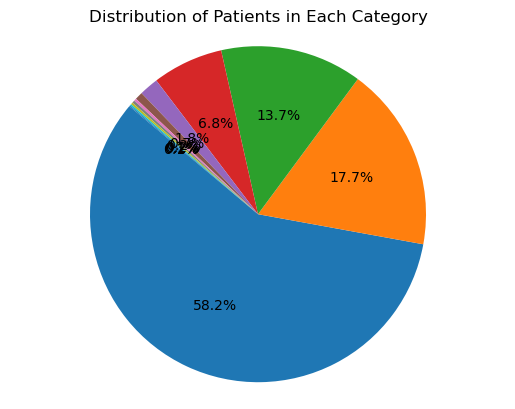

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
selected_columns = response2[['death_within_28_days','re_admission_within_28_days', 
                              'death_within_3_months','re_admission_within_3_months', 
                              'death_within_6_months','re_admission_within_6_months', 
                              'return_to_emergency_department_within_6_months']].value_counts()
print(selected_columns)
plt.pie(selected_columns,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients in Each Category')
plt.axis('equal') 
plt.show()

In [10]:
import pandas as pd
response4= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')
y=response4.sort_values(by='white_blood_cell')
#print(y)
y.head(1)


,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
865,746068,37.1,71,20,130,88,102.0,21,88.8,7.26,...,-2.6,21.6,0.3,37.0,97.0,95.0,96.3,16.8,1.11,94.0


In [ ]:
#34get the last letter of discharge_department of patients using RegEX

In [10]:
import pandas as pd
import re
response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
y=response2[['discharge_department','inpatient_number']].value_counts()

df = pd.DataFrame({'count': y.values}, index=y.index).reset_index()

def extract_last_letter(text):
    match = re.search(r'(\w)$', text)  # Match the last letter (\w) of the text
    if match:
        return match.group(1)  # Return the last letter
    return None
df['last_letter'] = df['discharge_department'].apply(extract_last_letter)

print(df)


     discharge_department  inpatient_number  count last_letter
0              Cardiology            722128      1           y
1              Cardiology            833857      1           y
2              Cardiology            834979      1           y
3              Cardiology            834911      1           y
4              Cardiology            834611      1           y
...                   ...               ...    ...         ...
2003           Cardiology            786087      1           y
2004           Cardiology            785960      1           y
2005           Cardiology            785929      1           y
2006           Cardiology            785878      1           y
2007               Others            869423      1           s

[2008 rows x 4 columns]


In [12]:
s = "python hackathon is good learning"
words = s.split(' ')
string = []
for x in words:
    string.insert(0, x)
 
 
print(" ".join(string))

learning good is hackathon python


In [ ]:
#find the patients who have 'h' in their DestinationDischarge and print them

In [13]:
import pandas as pd
from pandas import DataFrame,Series

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
data=response2[['DestinationDischarge']]
df=pd.DataFrame(data)
y=df['DestinationDischarge'].str.contains('h')
print(df[y])



     DestinationDischarge
7      HealthcareFacility
18     HealthcareFacility
22     HealthcareFacility
29     HealthcareFacility
31     HealthcareFacility
...                   ...
2001   HealthcareFacility
2002   HealthcareFacility
2003   HealthcareFacility
2004   HealthcareFacility
2005   HealthcareFacility

[438 rows x 1 columns]


In [ ]:
#Create a grouped bar chart that shows number of patients by gender and ageCat

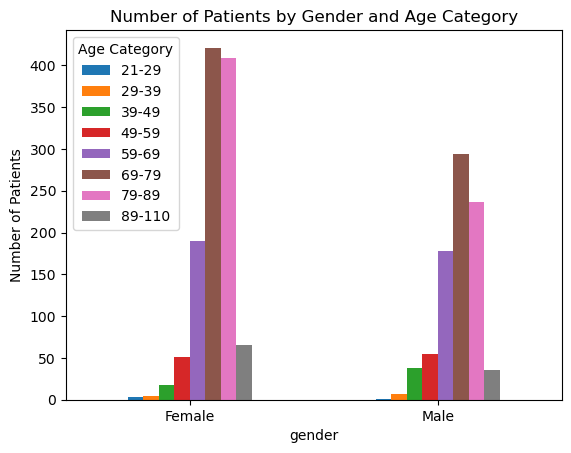

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
response4=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
x=response4.groupby(['gender','ageCat']).size().unstack()
x.plot(kind='bar', stacked=False)
plt.xlabel('gender')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Gender and Age Category')
plt.xticks(rotation=0)
plt.legend(title='Age Category')
plt.show()

In [ ]:
#Which Admission Ward has maximum number of visits scheduled

In [15]:
import pandas as pd

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
df=pd.DataFrame(response2)
admission_ward=response2.groupby(response2['admission_ward'])['visit_times'].value_counts()
print(admission_ward)
print(admission_ward.head(1))


admission_ward  visit_times
Cardiology      1              1427
                2                94
                3                18
                4                 6
                5                 2
GeneralWard     1               253
                2                10
                3                 2
ICU             1                13
                2                 2
Others          1               167
                2                14
Name: count, dtype: int64
admission_ward  visit_times
Cardiology      1              1427
Name: count, dtype: int64


In [ ]:
#Display total count of patients in each discharge_department based on gender

In [16]:
import pandas as pd

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
response4=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
data=response2[['DestinationDischarge']]
data_gender=response4[['gender']]
df = pd.concat([data,data_gender], axis=1)
patient_counts = df.groupby(['DestinationDischarge', 'gender']).size()
print(patient_counts)
print(len(patient_counts))



DestinationDischarge  gender
Died                  Female      4
                      Male       10
HealthcareFacility    Female    260
                      Male      178
Home                  Female    774
                      Male      570
Unknown               Female    125
                      Male       87
dtype: int64
8


In [ ]:
#How many Unique patients were precribed each type of medication?

In [8]:
import pandas as pd

response5=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Patient_Precriptions')
y=response5[response5['Drug_name']].nunique()
#x_unique=response5.groupby('inpatient_number')['Drug_name'].nunique()
#print(x_unique)
print(y)

KeyError: "None of [Index(['sulfotanshinone sodium injection', 'Furosemide tablet',\n       'Enoxaparin Sodium injection',\n       'Meglumine Adenosine Cyclophosphate for injection',\n       'Furosemide injection', 'Milrinone injection',\n       'Metoprolol Succinate Sustained-release tablet',\n       'Deslanoside injection', 'Torasemide tablet',\n       'Benazepril hydrochloride tablet',\n       ...\n       'Milrinone injection', 'Furosemide injection', 'Digoxin tablet',\n       'Deslanoside injection', 'Milrinone injection', 'Furosemide injection',\n       'Deslanoside injection', 'Milrinone injection', 'Furosemide injection',\n       'Meglumine Adenosine Cyclophosphate for injection'],\n      dtype='object', length=15370)] are in the [columns]"

In [ ]:
#Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [18]:
import pandas as pd
response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')

highest_discharg_days=response2 [response2['dischargeDay'] >20]
x=highest_discharg_days.sort_values(by='dischargeDay',ascending=False)
y=x['outcome_during_hospitalization']
print(y.head())


884     Alive
1613    Alive
1548    Alive
1573    Alive
1513    Alive
Name: outcome_during_hospitalization, dtype: object


In [11]:
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt 
from pyWaffle import waffle 
Hospital_Discharge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
Totaldeaths=Hospital_Discharge[Hospital_Discharge['outcome_during_hospitalization']=='Dead'].count()
print(len(Totaldeaths))
deathby_eachward=Hospital_Discharge[Hospital_Discharge['outcome_during_hospitalization']=='Dead'].groupby('admission_ward')['inpatient_number'].count()
print(deathby_eachward)
percentage=(Totaldeaths/deathby_eachward)*100
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 4, 
    values = Hospital_Discharge.deathby_eachward, 
    labels = list(Hospital_Discharge.admission_ward) 
)

ModuleNotFoundError: No module named 'pyWaffle'